In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import jinja2

In [3]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 KB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 KB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 KB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 23.2 MB/s eta 0:00:00

In [4]:
from pycaret.regression import *

In [6]:
ls

drive/  logs.log  sample_data/


In [10]:
cd ./drive/MyDrive/Datathon/

/content/drive/MyDrive/Datathon


In [11]:
ls

clean_macro.csv                     macro_data.csv
data_descriptions.txt               pca_macro.csv
datathon/                           training_data.csv
forecast_reduced_both.csv           training_preprocessed.csv
forecast_reduced_only_col.csv       training_reduced_both.csv
forecast_starting_data.csv          training_reduced_only_col.csv
good.csv                            uiuc_datathon.pptx
macro_data_5_features_selected.csv  Untitled0.ipynb


In [200]:
test[]

,charge_off,mth_code,snapshot,account_status_code,active,bank_fico_buckets_20,ever_delinquent_flg,industry,mob,stmt_balance,...,month_diff,industry_A,industry_B,industry_C,date,unemployment_rate,debt_service_burden,consumer_credit,interest_rates,charge_off_rates
0,0,25,25,0,1,12.0,0.0,B,42,0.00,...,0,0,1,0,202001,3.5,9.978751,2.429064,4.750000,4.103877
1,0,25,25,1,1,12.0,0.0,B,48,0.00,...,0,0,1,0,202001,3.5,9.978751,2.429064,4.750000,4.103877
2,0,25,25,0,1,12.0,0.0,A,244,497.80,...,0,1,0,0,202001,3.5,9.978751,2.429064,4.750000,4.103877
3,0,25,25,0,1,5.0,0.0,A,76,0.00,...,0,1,0,0,202001,3.5,9.978751,2.429064,4.750000,4.103877
4,0,25,25,0,1,12.0,0.0,C,143,430.09,...,0,0,0,1,202001,3.5,9.978751,2.429064,4.750000,4.103877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258253,0,37,25,0,1,5.0,0.0,A,26,0.00,...,12,1,0,0,202101,6.4,9.706190,6.232676,3.233733,10.472146
258254,0,37,25,1,1,6.0,0.0,C,299,3585.37,...,12,0,0,1,202101,6.4,9.706190,6.232676,3.233733,10.472146
258255,0,37,25,0,1,11.0,1.0,C,4,0.00,...,12,0,0,1,202101,6.4,9.706190,6.232676,3.233733,10.472146
258256,0,37,25,1,1,9.0,0.0,B,24,0.00,...,12,0,1,0,202101,6.4,9.706190,6.232676,3.233733,10.472146


In [69]:
train = pd.read_csv('better.csv')
macro_se = pd.read_csv('macro_data_5_features_selected.csv')
macro_pca = pd.read_csv('pca_macro.csv')
train.insert(0,'charge_off_pro',train['charge_off_p'])
train = train.drop('charge_off_p',axis=1)

In [199]:
train

,charge_off_pro,snapshot,mth_code,account_status_code,active,bank_fico_buckets_20,ever_delinquent_flg,mob,stmt_balance,prev_balance,balance_decrease,month_diff,industry_A,industry_B,industry_C
0,0.000000,201801,201801,0.672928,1.000000,9.217998,0.111693,60.215480,785.094246,810.826223,25.731977,0.0,0.227112,0.583795,0.189093
1,0.003928,201801,201802,0.666902,0.996072,9.170578,0.111755,60.253425,771.162752,789.697385,18.534632,1.0,0.231315,0.582192,0.186493
2,0.004804,201801,201803,0.672330,0.995196,9.207221,0.108515,59.255512,770.332103,796.755381,26.423278,2.0,0.226032,0.588491,0.185477
3,0.003405,201801,201804,0.670054,0.996595,9.227755,0.112861,58.943188,775.782264,776.045289,0.263025,3.0,0.232075,0.582804,0.185121
4,0.004129,201801,201805,0.668672,0.995871,9.173745,0.109457,59.937905,775.811367,796.240531,20.429164,4.0,0.228601,0.582513,0.188886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.002647,201910,201911,0.532169,0.997353,9.373867,0.103176,58.953782,775.917080,786.746013,10.828933,1.0,0.223455,0.616919,0.159625
296,0.003121,201910,201912,0.527422,0.996828,9.394249,0.098844,59.038883,771.720375,805.916063,34.195688,2.0,0.227617,0.610099,0.162284
297,0.000000,201911,201911,0.534353,1.000000,9.479986,0.096321,56.129763,804.717327,801.638307,-3.079021,0.0,0.227959,0.609597,0.162444
298,0.002438,201911,201912,0.536012,0.997562,9.492889,0.097115,56.736337,812.448763,825.465287,13.016524,1.0,0.228820,0.610880,0.160301


In [70]:
macro_pca

,Mnemonic,pca1,pca2,pca3,pca4,pca5,pca6
0,201801,-6.517806,4.123471,-4.323530,0.185720,2.191525,2.575033
1,201802,-6.407877,3.912278,-4.092868,-0.005099,1.387246,1.921441
2,201803,-6.320073,3.500826,-3.598134,0.040396,1.329952,1.696535
3,201804,-6.475806,3.273602,-3.439609,0.314958,0.727026,1.330711
4,201805,-6.504495,2.724625,-2.887565,0.394235,0.783710,1.188454
5,201806,-6.361751,2.489270,-2.802809,0.369761,0.558054,0.400310
6,201807,-6.223080,1.984654,-2.464190,0.607792,0.311032,0.085349
7,201808,-6.072541,1.630106,-2.141376,0.744067,0.077647,-0.200107
8,201809,-5.929753,1.302250,-1.753394,0.172565,-0.052948,-0.498745
9,201810,-5.948962,0.859243,-2.038835,-0.219677,-0.679609,-1.324000


In [71]:
train.head()

,charge_off_pro,snapshot,mth_code,account_status_code,active,bank_fico_buckets_20,ever_delinquent_flg,mob,stmt_balance,prev_balance,balance_decrease,month_diff,industry_A,industry_B,industry_C
0,0.000000,201801,201801,0.672928,1.000000,9.217998,0.111693,60.215480,785.094246,810.826223,25.731977,0.0,0.227112,0.583795,0.189093
1,0.003928,201801,201802,0.666902,0.996072,9.170578,0.111755,60.253425,771.162752,789.697385,18.534632,1.0,0.231315,0.582192,0.186493
2,0.004804,201801,201803,0.672330,0.995196,9.207221,0.108515,59.255512,770.332103,796.755381,26.423278,2.0,0.226032,0.588491,0.185477
3,0.003405,201801,201804,0.670054,0.996595,9.227755,0.112861,58.943188,775.782264,776.045289,0.263025,3.0,0.232075,0.582804,0.185121
4,0.004129,201801,201805,0.668672,0.995871,9.173745,0.109457,59.937905,775.811367,796.240531,20.429164,4.0,0.228601,0.582513,0.188886


In [72]:
len(train['mth_code'].value_counts())

24

In [73]:
macro_se.head(15)

,date,month,unemployment_rate,debt_service_burden,consumer_credit,interest_rates,charge_off_rates
0,201801,1,4.0,9.772692,2.533887,4.500000,3.664279
1,201802,2,4.1,9.727890,2.552633,4.500000,3.650039
2,201803,3,4.0,9.709184,2.527467,4.579545,3.635683
3,201804,4,4.0,9.707564,2.486718,4.750000,3.627844
4,201805,5,3.8,9.707665,2.466230,4.750000,3.634638
5,201806,6,4.0,9.698626,2.371999,4.892857,3.657519
6,201807,7,3.8,9.687634,2.472498,5.000000,3.680373
7,201808,8,3.8,9.687997,2.460224,5.000000,3.681015
8,201809,9,3.7,9.706854,2.453855,5.026316,3.648614
9,201810,10,3.8,9.733200,2.471184,5.250000,3.605848


In [74]:
join = pd.merge(train,macro_se,left_on='mth_code',right_on='date',how='left')

In [104]:
join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   charge_off_pro        300 non-null    float64
 1   snapshot              300 non-null    int64  
 2   mth_code              300 non-null    int64  
 3   account_status_code   300 non-null    float64
 4   active                300 non-null    float64
 5   bank_fico_buckets_20  300 non-null    float64
 6   ever_delinquent_flg   300 non-null    float64
 7   mob                   300 non-null    float64
 8   stmt_balance          300 non-null    float64
 9   prev_balance          300 non-null    float64
 10  balance_decrease      300 non-null    float64
 11  month_diff            300 non-null    float64
 12  industry_A            300 non-null    float64
 13  industry_B            300 non-null    float64
 14  industry_C            300 non-null    float64
 15  date                  3

In [106]:
join = join.drop('active',axis=1)

In [139]:
join = join.drop('month',axis=1)

In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   charge_off_pro        300 non-null    float64
 1   snapshot              300 non-null    int64  
 2   mth_code              300 non-null    int64  
 3   account_status_code   300 non-null    float64
 4   active                300 non-null    float64
 5   bank_fico_buckets_20  300 non-null    float64
 6   ever_delinquent_flg   300 non-null    float64
 7   mob                   300 non-null    float64
 8   stmt_balance          300 non-null    float64
 9   prev_balance          300 non-null    float64
 10  balance_decrease      300 non-null    float64
 11  month_diff            300 non-null    float64
 12  industry_A            300 non-null    float64
 13  industry_B            300 non-null    float64
 14  industry_C            300 non-null    float64
dtypes: float64(13), int64(2

In [76]:
train['mth_code'].value_counts()

201912    24
201911    23
201910    22
201909    21
201908    20
201907    19
201906    18
201905    17
201904    16
201903    15
201902    14
201901    13
201812    12
201811    11
201810    10
201809     9
201808     8
201807     7
201806     6
201805     5
201804     4
201803     3
201802     2
201801     1
Name: mth_code, dtype: int64

In [77]:
join[join['mth_code']==201912]

,charge_off_pro,snapshot,mth_code,account_status_code,active,bank_fico_buckets_20,ever_delinquent_flg,mob,stmt_balance,prev_balance,...,industry_A,industry_B,industry_C,date,month,unemployment_rate,debt_service_burden,consumer_credit,interest_rates,charge_off_rates
23,0.002265,201801,201912,0.671713,0.997735,9.208840,0.103702,60.271713,783.002307,788.985615,...,0.233149,0.579282,0.187569,201912,24,3.6,9.85236,2.407747,4.75,3.884991
46,0.002529,201802,201912,0.655358,0.997471,9.171056,0.116952,60.426843,762.173695,760.795711,...,0.233848,0.583494,0.182658,201912,24,3.6,9.85236,2.407747,4.75,3.884991
68,0.002801,201803,201912,0.642375,0.997199,9.183975,0.121588,59.673952,767.294680,787.478783,...,0.223681,0.590422,0.185897,201912,24,3.6,9.85236,2.407747,4.75,3.884991
89,0.002311,201804,201912,0.637594,0.997689,9.175150,0.114511,58.502834,746.438045,756.713242,...,0.235789,0.577725,0.186485,201912,24,3.6,9.85236,2.407747,4.75,3.884991
109,0.002839,201805,201912,0.633231,0.997161,9.247789,0.115485,61.319482,790.828905,791.486429,...,0.222289,0.586710,0.191001,201912,24,3.6,9.85236,2.407747,4.75,3.884991
128,0.002905,201806,201912,0.621697,0.997040,9.256770,0.111830,60.084311,762.005530,770.886936,...,0.227113,0.582063,0.190823,201912,24,3.6,9.85236,2.407747,4.75,3.884991
146,0.002400,201807,201912,0.612360,0.997546,9.216810,0.109960,59.069707,760.059642,788.755914,...,0.227610,0.594415,0.177975,201912,24,3.6,9.85236,2.407747,4.75,3.884991
163,0.002664,201808,201912,0.600130,0.997336,9.241411,0.100402,58.557839,808.863830,781.434109,...,0.225756,0.600022,0.174223,201912,24,3.6,9.85236,2.407747,4.75,3.884991
179,0.002838,201809,201912,0.606003,0.997162,9.147394,0.112851,58.434325,753.729696,779.772283,...,0.224065,0.601037,0.174898,201912,24,3.6,9.85236,2.407747,4.75,3.884991
194,0.003047,201810,201912,0.602992,0.996953,9.141349,0.105930,58.683732,743.638791,771.404822,...,0.230087,0.591621,0.178292,201912,24,3.6,9.85236,2.407747,4.75,3.884991


In [78]:
join.shape

(300, 22)

In [202]:
test = pd.read_csv('grouped.csv')

In [205]:
test['date'] = test['date'].astype(int)

In [206]:
test

,charge_off,account_status_code,active,bank_fico_buckets_20,ever_delinquent_flg,mob,stmt_balance,prev_balance,balance_decrease,month_diff,industry_A,industry_B,industry_C,date,unemployment_rate,debt_service_burden,consumer_credit,interest_rates,charge_off_rates
0,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,0.0,0.232709,0.591513,0.175778,202001,3.5,9.978751,2.429064,4.750000,4.103877
1,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,1.0,0.232709,0.591513,0.175778,202002,3.5,9.901571,2.365873,4.750000,3.992866
2,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,2.0,0.232709,0.591513,0.175778,202003,4.4,9.542168,2.320375,3.750000,3.483222
3,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,3.0,0.232709,0.591513,0.175778,202004,14.7,9.084334,2.116472,3.250000,3.137532
4,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,4.0,0.232709,0.591513,0.175778,202005,13.2,8.818207,2.377833,3.250000,3.767166
5,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,5.0,0.232709,0.591513,0.175778,202006,11.0,8.921575,2.542016,2.808626,5.788258
6,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,6.0,0.232709,0.591513,0.175778,202007,10.2,9.252138,2.815054,3.068610,8.500390
7,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,7.0,0.232709,0.591513,0.175778,202008,8.4,9.559778,3.438074,3.254417,10.844563
8,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,8.0,0.232709,0.591513,0.175778,202009,7.9,9.659441,4.303607,3.318058,11.968502
9,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,9.0,0.232709,0.591513,0.175778,202010,6.9,9.615622,5.216225,3.285077,12.068256


In [230]:
reg_test_1 = setup(data=join,
                   target='charge_off_pro',
                   train_size= 0.8,
                   fold=10)

,Description,Value
0,Session id,8346
1,Target,charge_off_pro
2,Target type,Regression
3,Original data shape,"(300, 20)"
4,Transformed data shape,"(300, 20)"
5,Transformed train set shape,"(240, 20)"
6,Transformed test set shape,"(60, 20)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple


In [233]:
best = compare_models(sort='rmse',n_select=4)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.0003,0.0000,0.0004,0.8154,0.0004,0.1157,0.3690
gbr,Gradient Boosting Regressor,0.0003,0.0000,0.0004,0.7880,0.0004,0.1254,0.4310
xgboost,Extreme Gradient Boosting,0.0003,0.0000,0.0004,0.8125,0.0004,0.1157,0.2600
ada,AdaBoost Regressor,0.0003,0.0000,0.0004,0.8114,0.0004,0.1218,0.2640
dt,Decision Tree Regressor,0.0004,0.0000,0.0005,0.6949,0.0005,0.1502,0.3350
et,Extra Trees Regressor,0.0004,0.0000,0.0005,0.7549,0.0005,0.1138,0.3100
lightgbm,Light Gradient Boosting Machine,0.0005,0.0000,0.0007,0.4509,0.0007,0.1596,0.2540
omp,Orthogonal Matching Pursuit,0.0007,0.0000,0.0009,0.0234,0.0009,0.1612,0.2360
lr,Linear Regression,0.0007,0.0000,0.0009,0.0038,0.0009,0.1840,0.4680
br,Bayesian Ridge,0.0007,0.0000,0.0009,0.0602,0.0009,0.1754,0.2820


Processing:   0%|          | 0/84 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

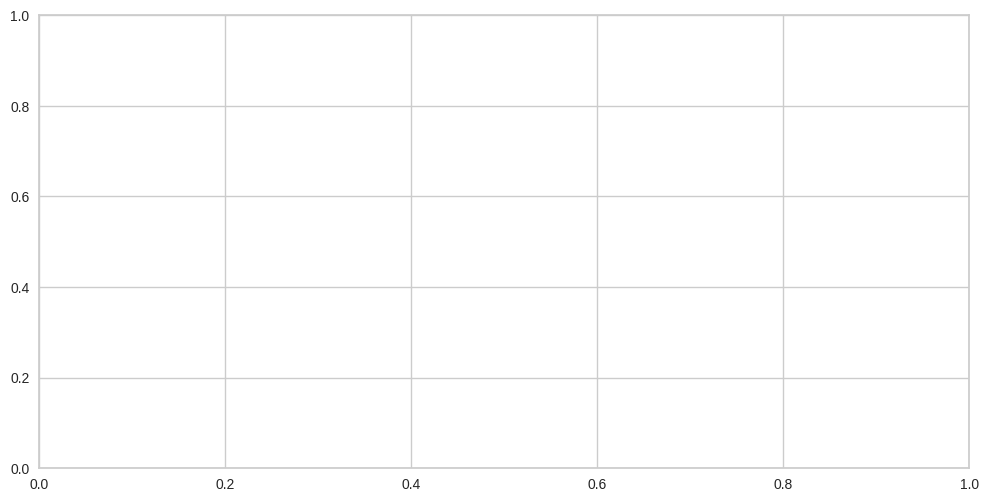

In [232]:
evaluate_model(best)

In [234]:
tuned_model = [tune_model(i) for i in best]
blended_model = blend_models(estimator_list=tuned_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0003,0.0000,0.0004,0.6638,0.0004,0.1046
1,0.0004,0.0000,0.0006,0.7445,0.0006,0.1524
2,0.0004,0.0000,0.0005,0.7262,0.0005,0.1480
3,0.0004,0.0000,0.0005,0.7985,0.0005,0.1879
4,0.0004,0.0000,0.0005,0.7422,0.0005,0.1411
5,0.0004,0.0000,0.0005,0.6197,0.0005,0.1494
6,0.0004,0.0000,0.0005,0.5453,0.0005,0.1533
7,0.0003,0.0000,0.0004,0.8477,0.0004,0.1067
8,0.0004,0.0000,0.0005,0.7137,0.0005,0.1556


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0006,0.0000,0.0008,-0.1731,0.0008,0.1447
1,0.0008,0.0000,0.0012,-0.0116,0.0011,0.1605
2,0.0006,0.0000,0.0010,-0.0018,0.0010,0.1389
3,0.0009,0.0000,0.0012,-0.1081,0.0012,0.1756
4,0.0007,0.0000,0.0010,-0.0120,0.0010,0.1548
5,0.0005,0.0000,0.0008,-0.0203,0.0008,0.1457
6,0.0006,0.0000,0.0008,-0.0315,0.0008,0.1469
7,0.0007,0.0000,0.0011,-0.0014,0.0011,0.1313
8,0.0006,0.0000,0.0009,-0.0148,0.0009,0.1477


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0003,0.0000,0.0004,0.7333,0.0004,0.1086
1,0.0003,0.0000,0.0005,0.8366,0.0005,0.1367
2,0.0003,0.0000,0.0004,0.8311,0.0004,0.1063
3,0.0004,0.0000,0.0005,0.8345,0.0005,0.1451
4,0.0004,0.0000,0.0004,0.8072,0.0004,0.1216
5,0.0003,0.0000,0.0004,0.6941,0.0004,0.1280
6,0.0004,0.0000,0.0005,0.6735,0.0005,0.1256
7,0.0002,0.0000,0.0003,0.9164,0.0003,0.0766
8,0.0004,0.0000,0.0005,0.6557,0.0005,0.1591


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0002,0.0000,0.0003,0.8329,0.0003,0.0772
1,0.0003,0.0000,0.0005,0.8348,0.0005,0.1362
2,0.0003,0.0000,0.0004,0.8411,0.0004,0.1029
3,0.0003,0.0000,0.0004,0.8728,0.0004,0.1509
4,0.0003,0.0000,0.0004,0.8556,0.0004,0.1114
5,0.0003,0.0000,0.0004,0.7447,0.0004,0.1160
6,0.0003,0.0000,0.0004,0.7253,0.0004,0.1162
7,0.0003,0.0000,0.0003,0.9136,0.0003,0.0948
8,0.0004,0.0000,0.0005,0.7043,0.0005,0.1601


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0002,0.0000,0.0003,0.8310,0.0003,0.0824
1,0.0003,0.0000,0.0004,0.8459,0.0004,0.1261
2,0.0003,0.0000,0.0004,0.8521,0.0004,0.0970
3,0.0003,0.0000,0.0004,0.8818,0.0004,0.1436
4,0.0003,0.0000,0.0004,0.8698,0.0004,0.1039
5,0.0003,0.0000,0.0004,0.7434,0.0004,0.1156
6,0.0003,0.0000,0.0004,0.7046,0.0004,0.1195
7,0.0003,0.0000,0.0003,0.9005,0.0003,0.0936
8,0.0004,0.0000,0.0005,0.7317,0.0005,0.1465


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [235]:
final_model = finalize_model(blended_model)

In [201]:
ls

better.csv                     logs.log
clean_macro.csv                macro_data_5_features_selected.csv
data_descriptions.txt          macro_data.csv
datathon/                      pca_macro.csv
forecast_for_test.csv          training_data.csv
forecast_preprocessed.csv      training_preprocessed.csv
forecast_reduced_both.csv      training_reduced_both.csv
forecast_reduced_only_col.csv  training_reduced_only_col.csv
forecast_starting_data.csv     training_with_macro.csv
good.csv                       uiuc_datathon.pptx
grouped.csv                    Untitled0.ipynb


In [236]:
test

,charge_off,account_status_code,active,bank_fico_buckets_20,ever_delinquent_flg,mob,stmt_balance,prev_balance,balance_decrease,month_diff,industry_A,industry_B,industry_C,date,unemployment_rate,debt_service_burden,consumer_credit,interest_rates,charge_off_rates
0,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,0.0,0.232709,0.591513,0.175778,202001,3.5,9.978751,2.429064,4.750000,4.103877
1,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,1.0,0.232709,0.591513,0.175778,202002,3.5,9.901571,2.365873,4.750000,3.992866
2,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,2.0,0.232709,0.591513,0.175778,202003,4.4,9.542168,2.320375,3.750000,3.483222
3,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,3.0,0.232709,0.591513,0.175778,202004,14.7,9.084334,2.116472,3.250000,3.137532
4,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,4.0,0.232709,0.591513,0.175778,202005,13.2,8.818207,2.377833,3.250000,3.767166
5,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,5.0,0.232709,0.591513,0.175778,202006,11.0,8.921575,2.542016,2.808626,5.788258
6,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,6.0,0.232709,0.591513,0.175778,202007,10.2,9.252138,2.815054,3.068610,8.500390
7,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,7.0,0.232709,0.591513,0.175778,202008,8.4,9.559778,3.438074,3.254417,10.844563
8,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,8.0,0.232709,0.591513,0.175778,202009,7.9,9.659441,4.303607,3.318058,11.968502
9,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,9.0,0.232709,0.591513,0.175778,202010,6.9,9.615622,5.216225,3.285077,12.068256


In [238]:
test['snapshot'] = 25
test['mth_code']=list(range(25,38))

In [239]:
pred = predict_model(final_model,data=test)

In [242]:
result1 = pred['prediction_label']*19866

In [195]:
pred[pred['prediction_label']<0]

,charge_off,mth_code,snapshot,account_status_code,active,bank_fico_buckets_20,ever_delinquent_flg,industry,mob,stmt_balance,...,industry_A,industry_B,industry_C,date,unemployment_rate,debt_service_burden,consumer_credit,interest_rates,charge_off_rates,prediction_label
2,0,25,25,0,1,12.0,0.0,A,244,497.799988,...,1,0,0,202001,3.5,9.978751,2.429064,4.75,4.103877,-0.000085
3,0,25,25,0,1,5.0,0.0,A,76,0.000000,...,1,0,0,202001,3.5,9.978751,2.429064,4.75,4.103877,-0.000071
6,0,25,25,0,1,12.0,1.0,A,53,1687.989990,...,1,0,0,202001,3.5,9.978751,2.429064,4.75,4.103877,-0.000075
9,0,25,25,1,1,12.0,0.0,A,10,0.000000,...,1,0,0,202001,3.5,9.978751,2.429064,4.75,4.103877,-0.000024
10,0,25,25,1,1,12.0,0.0,A,58,64.360001,...,1,0,0,202001,3.5,9.978751,2.429064,4.75,4.103877,-0.000031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19850,0,25,25,0,1,4.0,0.0,A,40,650.239990,...,1,0,0,202001,3.5,9.978751,2.429064,4.75,4.103877,-0.000080
19852,0,25,25,0,1,12.0,0.0,A,5,0.000000,...,1,0,0,202001,3.5,9.978751,2.429064,4.75,4.103877,-0.000097
19855,0,25,25,0,1,9.0,0.0,A,38,0.000000,...,1,0,0,202001,3.5,9.978751,2.429064,4.75,4.103877,-0.000080
19858,0,25,25,1,1,12.0,0.0,A,48,0.000000,...,1,0,0,202001,3.5,9.978751,2.429064,4.75,4.103877,-0.000021


In [198]:
pred

,charge_off,mth_code,snapshot,account_status_code,active,bank_fico_buckets_20,ever_delinquent_flg,industry,mob,stmt_balance,...,industry_A,industry_B,industry_C,date,unemployment_rate,debt_service_burden,consumer_credit,interest_rates,charge_off_rates,prediction_label
0,0,25,25,0,1,12.0,0.0,B,42,0.000000,...,0,1,0,202001,3.5,9.978751,2.429064,4.750000,4.103877,0.000019
1,0,25,25,1,1,12.0,0.0,B,48,0.000000,...,0,1,0,202001,3.5,9.978751,2.429064,4.750000,4.103877,0.000021
2,0,25,25,0,1,12.0,0.0,A,244,497.799988,...,1,0,0,202001,3.5,9.978751,2.429064,4.750000,4.103877,-0.000085
3,0,25,25,0,1,5.0,0.0,A,76,0.000000,...,1,0,0,202001,3.5,9.978751,2.429064,4.750000,4.103877,-0.000071
4,0,25,25,0,1,12.0,0.0,C,143,430.089996,...,0,0,1,202001,3.5,9.978751,2.429064,4.750000,4.103877,0.000169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258253,0,37,25,0,1,5.0,0.0,A,26,0.000000,...,1,0,0,202101,6.4,9.706190,6.232676,3.233733,10.472146,0.002830
258254,0,37,25,1,1,6.0,0.0,C,299,3585.370117,...,0,0,1,202101,6.4,9.706190,6.232676,3.233733,10.472146,0.003309
258255,0,37,25,0,1,11.0,1.0,C,4,0.000000,...,0,0,1,202101,6.4,9.706190,6.232676,3.233733,10.472146,0.003124
258256,0,37,25,1,1,9.0,0.0,B,24,0.000000,...,0,1,0,202101,6.4,9.706190,6.232676,3.233733,10.472146,0.002916


In [197]:
test['mth_code'].value_counts()

25    19866
26    19866
27    19866
28    19866
29    19866
30    19866
31    19866
32    19866
33    19866
34    19866
35    19866
36    19866
37    19866
Name: mth_code, dtype: int64

In [196]:
pred.shape

(258258, 23)

In [148]:
pred['prediction_label'].describe()

count    258258.000000
mean          0.002953
std           0.000847
min          -0.000112
25%           0.003054
50%           0.003188
75%           0.003289
max           0.003639
Name: prediction_label, dtype: float64

In [109]:
best_tune = tune_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0004,0.0000,0.0005,0.7798,0.0005,0.1062
1,0.0005,0.0000,0.0005,0.7152,0.0005,0.1417
2,0.0004,0.0000,0.0005,0.7603,0.0005,0.1160
3,0.0003,0.0000,0.0004,0.6892,0.0004,0.1040
4,0.0005,0.0000,0.0006,0.7540,0.0006,0.1328
5,0.0005,0.0000,0.0007,0.6668,0.0007,0.1324
6,0.0004,0.0000,0.0004,0.6854,0.0004,0.1063
7,0.0003,0.0000,0.0004,0.1422,0.0004,0.1011
8,0.0004,0.0000,0.0005,0.5563,0.0005,0.1262


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

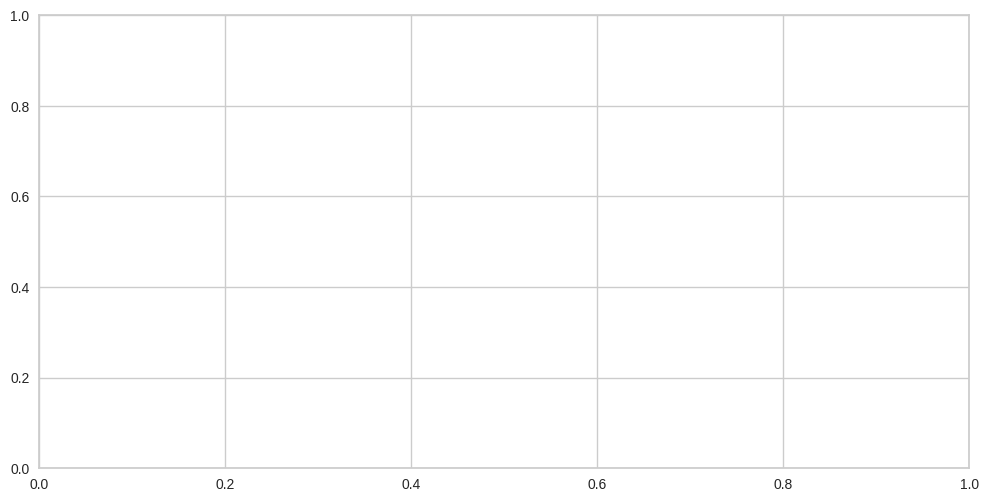

In [110]:
evaluate_model(best_tune)

In [149]:
join2 = pd.merge(train,macro_pca,left_on='mth_code',right_on='Mnemonic',how='left')
join2 = join2.drop('active',axis=1)

In [150]:
reg_test_2 = setup(data=join2,
                   target='charge_off_pro',
                   train_size= 0.8,
                   fold=10)

,Description,Value
0,Session id,5757
1,Target,charge_off_pro
2,Target type,Regression
3,Original data shape,"(300, 21)"
4,Transformed data shape,"(300, 21)"
5,Transformed train set shape,"(240, 21)"
6,Transformed test set shape,"(60, 21)"
7,Numeric features,20
8,Preprocess,True
9,Imputation type,simple


In [155]:
best2 = compare_models(sort='rmse',n_select=4)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.0003,0.0000,0.0004,0.7004,0.0004,0.1137,0.2670
gbr,Gradient Boosting Regressor,0.0003,0.0000,0.0004,0.7039,0.0004,0.1166,0.2380
xgboost,Extreme Gradient Boosting,0.0003,0.0000,0.0004,0.7107,0.0004,0.1129,0.2310
ada,AdaBoost Regressor,0.0003,0.0000,0.0004,0.7011,0.0004,0.1157,0.3740
dt,Decision Tree Regressor,0.0004,0.0000,0.0005,0.3745,0.0005,0.1551,0.2090
et,Extra Trees Regressor,0.0004,0.0000,0.0005,0.6148,0.0005,0.1141,0.2910
lightgbm,Light Gradient Boosting Machine,0.0005,0.0000,0.0007,0.1856,0.0007,0.1580,0.3110
en,Elastic Net,0.0006,0.0000,0.0009,-0.0700,0.0009,0.1428,0.2110
lasso,Lasso Regression,0.0006,0.0000,0.0009,-0.0700,0.0009,0.1428,0.3620
llar,Lasso Least Angle Regression,0.0006,0.0000,0.0009,-0.0700,0.0009,0.1428,0.3160


Processing:   0%|          | 0/84 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

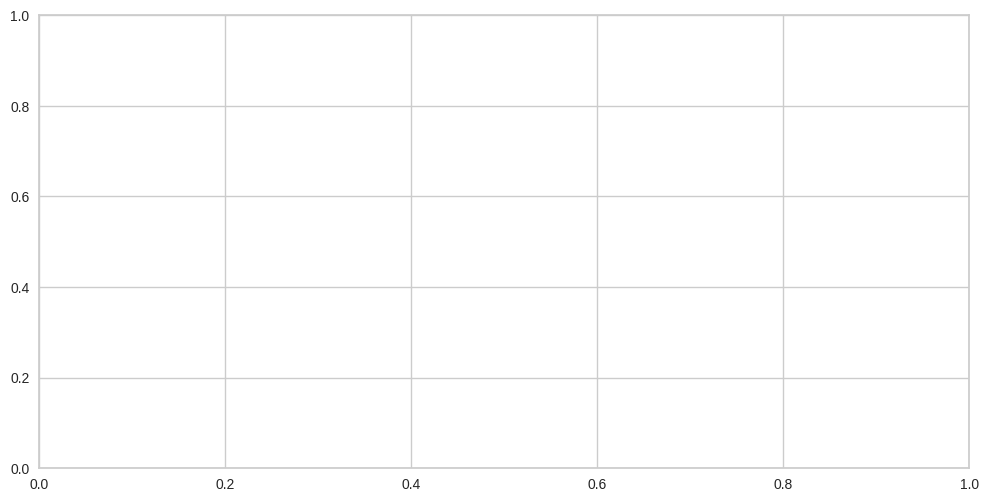

In [153]:
evaluate_model(best_tune2)

In [156]:
tuned_model2 = [tune_model(i) for i in best2]
blended_model2 = blend_models(estimator_list=tuned_model2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0003,0.0000,0.0004,0.8318,0.0004,0.1475
1,0.0004,0.0000,0.0005,0.6939,0.0005,0.1385
2,0.0003,0.0000,0.0004,-0.0271,0.0004,0.1111
3,0.0002,0.0000,0.0003,0.8821,0.0003,0.0885
4,0.0004,0.0000,0.0004,0.0256,0.0004,0.1326
5,0.0003,0.0000,0.0004,0.8137,0.0004,0.1275
6,0.0004,0.0000,0.0006,0.6378,0.0006,0.1377
7,0.0003,0.0000,0.0005,0.7847,0.0005,0.1096
8,0.0004,0.0000,0.0006,0.7357,0.0006,0.1672


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0004,0.0000,0.0005,0.7584,0.0005,0.1393
1,0.0005,0.0000,0.0006,0.4571,0.0006,0.1758
2,0.0003,0.0000,0.0004,0.1941,0.0004,0.0936
3,0.0003,0.0000,0.0004,0.8469,0.0004,0.0893
4,0.0003,0.0000,0.0004,0.1679,0.0004,0.1067
5,0.0003,0.0000,0.0004,0.8226,0.0004,0.1023
6,0.0004,0.0000,0.0005,0.7342,0.0005,0.1119
7,0.0005,0.0000,0.0007,0.5737,0.0007,0.1239
8,0.0005,0.0000,0.0006,0.7072,0.0006,0.1592


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0003,0.0000,0.0004,0.8881,0.0004,0.1124
1,0.0004,0.0000,0.0005,0.6327,0.0005,0.1540
2,0.0003,0.0000,0.0003,0.2637,0.0003,0.0956
3,0.0002,0.0000,0.0002,0.9331,0.0002,0.0692
4,0.0003,0.0000,0.0003,0.3764,0.0003,0.0870
5,0.0003,0.0000,0.0003,0.8888,0.0003,0.0990
6,0.0003,0.0000,0.0004,0.8154,0.0004,0.1024
7,0.0003,0.0000,0.0004,0.8603,0.0004,0.1024
8,0.0004,0.0000,0.0005,0.7436,0.0005,0.1663


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0002,0.0000,0.0004,0.8887,0.0004,0.1112
1,0.0004,0.0000,0.0005,0.6456,0.0005,0.1516
2,0.0003,0.0000,0.0003,0.2713,0.0003,0.0890
3,0.0002,0.0000,0.0002,0.9353,0.0002,0.0648
4,0.0003,0.0000,0.0003,0.3815,0.0003,0.0890
5,0.0003,0.0000,0.0003,0.8632,0.0003,0.1156
6,0.0003,0.0000,0.0004,0.8417,0.0004,0.1090
7,0.0003,0.0000,0.0004,0.8126,0.0004,0.1173
8,0.0004,0.0000,0.0005,0.7443,0.0005,0.1595


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0003,0.0000,0.0004,0.8787,0.0004,0.1166
1,0.0004,0.0000,0.0005,0.6438,0.0005,0.1528
2,0.0003,0.0000,0.0003,0.2726,0.0003,0.0934
3,0.0002,0.0000,0.0002,0.9399,0.0002,0.0638
4,0.0003,0.0000,0.0003,0.3927,0.0003,0.0911
5,0.0003,0.0000,0.0003,0.8846,0.0003,0.1076
6,0.0003,0.0000,0.0004,0.8437,0.0004,0.1042
7,0.0003,0.0000,0.0004,0.8499,0.0004,0.1024
8,0.0004,0.0000,0.0005,0.7533,0.0005,0.1593


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [160]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258258 entries, 0 to 258257
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   charge_off            258258 non-null  int64  
 1   mth_code              258258 non-null  int64  
 2   snapshot              258258 non-null  int64  
 3   account_status_code   258258 non-null  int64  
 4   active                258258 non-null  int64  
 5   bank_fico_buckets_20  258258 non-null  float64
 6   ever_delinquent_flg   258258 non-null  float64
 7   industry              258258 non-null  object 
 8   mob                   258258 non-null  int64  
 9   stmt_balance          258258 non-null  float64
 10  prev_balance          258258 non-null  float64
 11  balance_decrease      258258 non-null  float64
 12  month_diff            258258 non-null  int64  
 13  industry_A            258258 non-null  int64  
 14  industry_B            258258 non-null  int64  
 15  

In [171]:
test

,charge_off,mth_code,snapshot,account_status_code,active,bank_fico_buckets_20,ever_delinquent_flg,industry,mob,stmt_balance,...,month_diff,industry_A,industry_B,industry_C,date,unemployment_rate,debt_service_burden,consumer_credit,interest_rates,charge_off_rates
0,0,25,25,0,1,12.0,0.0,B,42,0.00,...,0,0,1,0,202001,3.5,9.978751,2.429064,4.750000,4.103877
1,0,25,25,1,1,12.0,0.0,B,48,0.00,...,0,0,1,0,202001,3.5,9.978751,2.429064,4.750000,4.103877
2,0,25,25,0,1,12.0,0.0,A,244,497.80,...,0,1,0,0,202001,3.5,9.978751,2.429064,4.750000,4.103877
3,0,25,25,0,1,5.0,0.0,A,76,0.00,...,0,1,0,0,202001,3.5,9.978751,2.429064,4.750000,4.103877
4,0,25,25,0,1,12.0,0.0,C,143,430.09,...,0,0,0,1,202001,3.5,9.978751,2.429064,4.750000,4.103877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258253,0,37,25,0,1,5.0,0.0,A,26,0.00,...,12,1,0,0,202101,6.4,9.706190,6.232676,3.233733,10.472146
258254,0,37,25,1,1,6.0,0.0,C,299,3585.37,...,12,0,0,1,202101,6.4,9.706190,6.232676,3.233733,10.472146
258255,0,37,25,0,1,11.0,1.0,C,4,0.00,...,12,0,0,1,202101,6.4,9.706190,6.232676,3.233733,10.472146
258256,0,37,25,1,1,9.0,0.0,B,24,0.00,...,12,0,1,0,202101,6.4,9.706190,6.232676,3.233733,10.472146


In [212]:
test2 = test.drop(list(test.columns)[14:],axis=1)

In [213]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   charge_off            13 non-null     float64
 1   account_status_code   13 non-null     float64
 2   active                13 non-null     float64
 3   bank_fico_buckets_20  13 non-null     float64
 4   ever_delinquent_flg   13 non-null     float64
 5   mob                   13 non-null     float64
 6   stmt_balance          13 non-null     float64
 7   prev_balance          13 non-null     float64
 8   balance_decrease      13 non-null     float64
 9   month_diff            13 non-null     float64
 10  industry_A            13 non-null     float64
 11  industry_B            13 non-null     float64
 12  industry_C            13 non-null     float64
 13  date                  13 non-null     int64  
dtypes: float64(13), int64(1)
memory usage: 1.5 KB


In [211]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   charge_off            13 non-null     float64
 1   account_status_code   13 non-null     float64
 2   active                13 non-null     float64
 3   bank_fico_buckets_20  13 non-null     float64
 4   ever_delinquent_flg   13 non-null     float64
 5   mob                   13 non-null     float64
 6   stmt_balance          13 non-null     float64
 7   prev_balance          13 non-null     float64
 8   balance_decrease      13 non-null     float64
 9   month_diff            13 non-null     float64
 10  industry_A            13 non-null     float64
 11  industry_B            13 non-null     float64
 12  industry_C            13 non-null     float64
 13  date                  13 non-null     int64  
 14  unemployment_rate     13 non-null     float64
 15  debt_service_burden   13 

In [167]:
macro_pca

,Mnemonic,pca1,pca2,pca3,pca4,pca5,pca6
0,201801,-6.517806,4.123471,-4.323530,0.185720,2.191525,2.575033
1,201802,-6.407877,3.912278,-4.092868,-0.005099,1.387246,1.921441
2,201803,-6.320073,3.500826,-3.598134,0.040396,1.329952,1.696535
3,201804,-6.475806,3.273602,-3.439609,0.314958,0.727026,1.330711
4,201805,-6.504495,2.724625,-2.887565,0.394235,0.783710,1.188454
5,201806,-6.361751,2.489270,-2.802809,0.369761,0.558054,0.400310
6,201807,-6.223080,1.984654,-2.464190,0.607792,0.311032,0.085349
7,201808,-6.072541,1.630106,-2.141376,0.744067,0.077647,-0.200107
8,201809,-5.929753,1.302250,-1.753394,0.172565,-0.052948,-0.498745
9,201810,-5.948962,0.859243,-2.038835,-0.219677,-0.679609,-1.324000


In [214]:
join3 = pd.merge(test2,macro_pca,left_on='date',right_on='Mnemonic',how='left')

In [215]:
join3

,charge_off,account_status_code,active,bank_fico_buckets_20,ever_delinquent_flg,mob,stmt_balance,prev_balance,balance_decrease,month_diff,...,industry_B,industry_C,date,Mnemonic,pca1,pca2,pca3,pca4,pca5,pca6
0,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,0.0,...,0.591513,0.175778,202001,202001,-1.856554,-5.821525,5.494517,-0.339981,0.915484,2.559434
1,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,1.0,...,0.591513,0.175778,202002,202002,-1.020297,-5.373535,5.584773,-0.146384,0.654626,2.424868
2,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,2.0,...,0.591513,0.175778,202003,202003,3.029591,1.647299,4.584357,-3.366677,-0.869353,2.019133
3,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,3.0,...,0.591513,0.175778,202004,202004,12.733836,15.860646,6.003231,-5.283120,-2.289682,0.525662
4,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,4.0,...,0.591513,0.175778,202005,202005,8.517669,7.010738,5.628701,6.240463,-0.722073,0.316772
5,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,5.0,...,0.591513,0.175778,202006,202006,9.192309,3.993088,3.253805,6.908311,2.253149,-1.237295
6,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,6.0,...,0.591513,0.175778,202007,202007,11.171562,2.633307,1.110278,-0.359771,3.177080,-1.946020
7,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,7.0,...,0.591513,0.175778,202008,202008,10.298942,-1.702275,-1.131791,-2.514622,4.209849,-1.838010
8,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,8.0,...,0.591513,0.175778,202009,202009,10.801266,-3.661333,-2.878512,-2.568015,3.104257,-1.318762
9,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,9.0,...,0.591513,0.175778,202010,202010,11.809978,-3.739603,-4.302757,-1.282643,0.757147,-0.355716


In [189]:
join2

,charge_off_pro,snapshot,mth_code,account_status_code,bank_fico_buckets_20,ever_delinquent_flg,mob,stmt_balance,prev_balance,balance_decrease,...,industry_A,industry_B,industry_C,Mnemonic,pca1,pca2,pca3,pca4,pca5,pca6
0,0.000000,201801,201801,0.672928,9.217998,0.111693,60.215480,785.094246,810.826223,25.731977,...,0.227112,0.583795,0.189093,201801,-6.517806,4.123471,-4.323530,0.185720,2.191525,2.575033
1,0.003928,201801,201802,0.666902,9.170578,0.111755,60.253425,771.162752,789.697385,18.534632,...,0.231315,0.582192,0.186493,201802,-6.407877,3.912278,-4.092868,-0.005099,1.387246,1.921441
2,0.004804,201801,201803,0.672330,9.207221,0.108515,59.255512,770.332103,796.755381,26.423278,...,0.226032,0.588491,0.185477,201803,-6.320073,3.500826,-3.598134,0.040396,1.329952,1.696535
3,0.003405,201801,201804,0.670054,9.227755,0.112861,58.943188,775.782264,776.045289,0.263025,...,0.232075,0.582804,0.185121,201804,-6.475806,3.273602,-3.439609,0.314958,0.727026,1.330711
4,0.004129,201801,201805,0.668672,9.173745,0.109457,59.937905,775.811367,796.240531,20.429164,...,0.228601,0.582513,0.188886,201805,-6.504495,2.724625,-2.887565,0.394235,0.783710,1.188454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.002647,201910,201911,0.532169,9.373867,0.103176,58.953782,775.917080,786.746013,10.828933,...,0.223455,0.616919,0.159625,201911,-1.970307,-4.268358,4.367430,-0.041598,0.109357,0.387058
296,0.003121,201910,201912,0.527422,9.394249,0.098844,59.038883,771.720375,805.916063,34.195688,...,0.227617,0.610099,0.162284,201912,-2.032244,-5.057148,4.913339,-0.188678,0.471914,1.535692
297,0.000000,201911,201911,0.534353,9.479986,0.096321,56.129763,804.717327,801.638307,-3.079021,...,0.227959,0.609597,0.162444,201911,-1.970307,-4.268358,4.367430,-0.041598,0.109357,0.387058
298,0.002438,201911,201912,0.536012,9.492889,0.097115,56.736337,812.448763,825.465287,13.016524,...,0.228820,0.610880,0.160301,201912,-2.032244,-5.057148,4.913339,-0.188678,0.471914,1.535692


In [224]:
join3['snapshot'] = 25
join3['mth_code']=list(range(25,38))

In [225]:
join3

,charge_off,account_status_code,active,bank_fico_buckets_20,ever_delinquent_flg,mob,stmt_balance,prev_balance,balance_decrease,month_diff,...,date,Mnemonic,pca1,pca2,pca3,pca4,pca5,pca6,snapshot,mth_code
0,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,0.0,...,202001,202001,-1.856554,-5.821525,5.494517,-0.339981,0.915484,2.559434,25,25
1,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,1.0,...,202002,202002,-1.020297,-5.373535,5.584773,-0.146384,0.654626,2.424868,25,26
2,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,2.0,...,202003,202003,3.029591,1.647299,4.584357,-3.366677,-0.869353,2.019133,25,27
3,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,3.0,...,202004,202004,12.733836,15.860646,6.003231,-5.283120,-2.289682,0.525662,25,28
4,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,4.0,...,202005,202005,8.517669,7.010738,5.628701,6.240463,-0.722073,0.316772,25,29
5,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,5.0,...,202006,202006,9.192309,3.993088,3.253805,6.908311,2.253149,-1.237295,25,30
6,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,6.0,...,202007,202007,11.171562,2.633307,1.110278,-0.359771,3.177080,-1.946020,25,31
7,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,7.0,...,202008,202008,10.298942,-1.702275,-1.131791,-2.514622,4.209849,-1.838010,25,32
8,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,8.0,...,202009,202009,10.801266,-3.661333,-2.878512,-2.568015,3.104257,-1.318762,25,33
9,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,9.0,...,202010,202010,11.809978,-3.739603,-4.302757,-1.282643,0.757147,-0.355716,25,34


In [157]:
final_model2 = finalize_model(blended_model)

In [226]:
pred2 = predict_model(final_model2,data=join3)

In [227]:
pred2

,charge_off,account_status_code,active,bank_fico_buckets_20,ever_delinquent_flg,mob,stmt_balance,prev_balance,balance_decrease,month_diff,...,Mnemonic,pca1,pca2,pca3,pca4,pca5,pca6,snapshot,mth_code,prediction_label
0,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002563,779.913818,29.911243,0.0,...,202001,-1.856554,-5.821525,5.494516,-0.339981,0.915484,2.559434,25,25,0.000088
1,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002563,779.913818,29.911243,1.0,...,202002,-1.020298,-5.373535,5.584773,-0.146384,0.654626,2.424868,25,26,0.002977
2,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002563,779.913818,29.911243,2.0,...,202003,3.029591,1.647299,4.584357,-3.366677,-0.869353,2.019133,25,27,0.003084
3,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002563,779.913818,29.911243,3.0,...,202004,12.733836,15.860646,6.003232,-5.283120,-2.289682,0.525662,25,28,0.003095
4,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002563,779.913818,29.911243,4.0,...,202005,8.517670,7.010738,5.628701,6.240463,-0.722073,0.316772,25,29,0.003118
5,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002563,779.913818,29.911243,5.0,...,202006,9.192309,3.993088,3.253805,6.908310,2.253149,-1.237295,25,30,0.003203
6,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002563,779.913818,29.911243,6.0,...,202007,11.171561,2.633307,1.110278,-0.359771,3.177080,-1.946020,25,31,0.003294
7,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002563,779.913818,29.911243,7.0,...,202008,10.298943,-1.702275,-1.131791,-2.514622,4.209849,-1.838010,25,32,0.003251
8,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002563,779.913818,29.911243,8.0,...,202009,10.801266,-3.661333,-2.878512,-2.568015,3.104258,-1.318762,25,33,0.003135
9,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002563,779.913818,29.911243,9.0,...,202010,11.809978,-3.739603,-4.302757,-1.282643,0.757147,-0.355716,25,34,0.003132


In [243]:
result1

0      2.291248
1     60.780062
2     62.678149
3     62.695475
4     62.993995
5     63.256278
6     63.265189
7     63.265189
8     62.269069
9     62.414680
10    62.350368
11    62.273777
12    61.761526
Name: prediction_label, dtype: float64

In [229]:
result2 = pred2['prediction_label']*19866
result2

0      1.738465
1     59.135519
2     61.263651
3     61.494314
4     61.943564
5     63.631378
6     65.439455
7     64.584174
8     62.270957
9     62.217482
10    61.146933
11    60.721549
12    58.578170
Name: prediction_label, dtype: float64

In [248]:
result1.sum()

752.2950048231174

In [244]:
result2.sum()

744.1656116067214